# Introduction 

America is known for its diversity. The nation is composed of immigrants from all over the world. When people leave their homelands and move elsewhere, they usually bring with them some aspects of their culture. One prominent aspect of every culture that everyone enjoys is food! This gives immigrants a great opportunity to pursue the American dream by opening a restaurant and exposing new demographics to the cuisine of their former countries and possibly prospering from this. This report will use Foursquare to examine the amount of results returned for Chinese, Indian, Italian, Japanese, Mexican and Thai restaurants, all popular foreign cuisines, for the most populated city in every state. The results of this report will show what the most populated city in every state is lacking in terms of variety. These results could be utilized by potential restaurateurs to choose a location where there would be less competition thus, possibly leading to a bigger market share. 

# Data & Methodology

The list of the largest city in each state came from this Wikipedia table:
https://en.wikipedia.org/wiki/List_of_largest_cities_of_U.S._states_and_territories_by_population

The table originally included the second, third, fourth and fifth most populated cities, as well as the capitals of the state if they weren't previously included. These were dropped as they weren't within the original plans of the report as well as pulling information for all of them would result in too many requests from the Foursquare API. Once the irrelevant data was abstracted, the city and state were concatenated to use geopy to pull the coordinates for each city and then place them into the data frame. 

Additional coordinates were pulled from:
https://www.gps-latitude-longitude.com/

when geopy returned errors for West Virginia and every state after.

Finally, the Foursquare API was combined with for loops to return the counts of the different types of restaurants; Chinese, Indian, Italian, Japanese, Mexican and Thai. These counts were then placed into the data frame and averaged to find mean number of ethnic restaurants in respective cities and states. That data was then visualized using matplotlib.

# Results, Discussion & Conclusion...
Can be found towards the end of the report.

In [2]:
pip install geopy

     |████████████████████████████████| 112kB 6.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install lxml

     |████████████████████████████████| 5.8MB 6.4MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [26]:
import folium
from geopy.geocoders import Nominatim
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import requests
import matplotlib.pyplot as plt

In [5]:
# Import table as data frame.
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_largest_cities_of_U.S._states_and_territories_by_population')

# Set data frame to first table
df = df[0]

# Drop irrelevant columns
df.drop(axis = 1, 
        columns = ['2nd most populous',
                   '3rd most populous',
                   '4th most populous',
                   '5th most populous',
                   'Capital (if not otherwise listed)'],
       inplace = True)

# Clean up formatting
df.rename(columns = {'State,Federal District,or Territory': 'State/District',
                    'State,Federal District,or Territory Population[5]': 'Total Population',
                    'Most populous': 'Most Populous City',
                    'City population': 'City Population'},
         inplace = True)

# Remove territories
df.drop(axis = 0,
       index = [2,
                12,
                37,
                42,
                50],
       inplace = True)

# Remove the 1 from Honolulu
df['Most Populous City'][13] = 'Honolulu'

# Reset row label count
df.reset_index(inplace = True)
df.drop(axis = 1,
       columns = ['index'],
       inplace = True)

# Test formatting
df.head()

,State/District,Total Population,Most Populous City,City Population
0,Alabama,4887871,Birmingham,209880
1,Alaska,737438,Anchorage,291538
2,Arizona,7171646,Phoenix,1660272
3,Arkansas,3013825,Little Rock,197881
4,California,39557045,Los Angeles,3990456


In [6]:
# Create 2nd data frame to make finding coordinates easier
concatCityState = df['Most Populous City'] + ', ' + df['State/District']
df2 = pd.DataFrame(data = concatCityState, columns = ['City & State'])
df2['Latitude'] = ''
df2['Longitude'] = ''

# Iterate through the cities to retrieve latitudes and longitudes and place them into lists
lats = []
longs = []

for i in df2['City & State'][0:47]:
    geolocator = Nominatim(user_agent="Capstone")
    csRow = geolocator.geocode(i)
    latRow = csRow.latitude
    longRow = csRow.longitude
    lats.append(latRow)
    longs.append(longRow)
    
# Print lists to see if the coordinates were retrieved
print(lats)
print(longs)

# Place coordinates into the data frame 
df2['Latitude'][0:47] = lats
df2['Longitude'][0:47] = longs

# Geopy was timing out at the 48th item so the rest had to be manually added.
# Manually added from https://www.gps-latitude-longitude.com/gps-coordinates-of-seattle-wa
df2['Latitude'][47] = 47.6062095
df2['Longitude'][47] = -122.3320708
df2['Latitude'][48] = 38.349820
df2['Longitude'][48] = -81.632623
df2['Latitude'][49] = 43.038902
df2['Longitude'][49] = -87.906474
df2['Latitude'][50] = 41.139981
df2['Longitude'][50] = -104.820246
df2

[33.5206824, 61.2163129, 33.4484367, 34.7464809, 34.0536909, 39.7392364, 41.1670412, 39.7459468, 38.8949855, 30.3321838, 33.7490987, 21.304547, 43.6166163, 41.8755616, 39.7683331, 41.5910641, 37.6922361, 38.2542376, 29.9499323, 43.6610277, 39.2908816, 42.3602534, 42.3315509, 44.9772995, 32.2990384, 39.100105, 45.7874957, 41.2587459, 36.1672559, 42.9956397, 40.735657, 35.0841034, 40.7127281, 35.2270869, 46.877229, 39.9622601, 35.4729886, 45.5202471, 39.9527237, 41.8239891, 32.7876012, 43.5499749, 36.1622296, 29.7589382, 40.7596198, 44.4762975, 36.8529841]
[-86.8024326, -149.8948523, -112.0741417, -92.2895948, -118.2427666, -104.9848623, -73.2048348, -75.546589, -77.0365708, -81.655651, -84.3901849, -157.8556764, -116.200886, -87.6244212, -86.1583502, -93.6037149, -97.3375448, -85.759407, -90.0701156, -70.2548596, -76.610759, -71.0582912, -83.0466403, -93.2654692, -90.1847691, -94.5781416, -108.49607, -95.9383758, -115.1485163, -71.4547891, -74.1723667, -106.6509851, -74.0060152, -80.843

,City & State,Latitude,Longitude
0,"Birmingham, Alabama",33.5207,-86.8024
1,"Anchorage, Alaska",61.2163,-149.895
2,"Phoenix, Arizona",33.4484,-112.074
3,"Little Rock, Arkansas",34.7465,-92.2896
4,"Los Angeles, California",34.0537,-118.243
5,"Denver, Colorado",39.7392,-104.985
6,"Bridgeport, Connecticut",41.167,-73.2048
7,"Wilmington, Delaware",39.7459,-75.5466
8,"Washington, District of Columbia",38.895,-77.0366
9,"Jacksonville, Florida",30.3322,-81.6557


In [7]:
# Move the coordinates into the original data frame
df['Latitude'] = df2['Latitude']
df['Longitude'] = df2['Longitude']
df

,State/District,Total Population,Most Populous City,City Population,Latitude,Longitude
0,Alabama,4887871,Birmingham,209880,33.5207,-86.8024
1,Alaska,737438,Anchorage,291538,61.2163,-149.895
2,Arizona,7171646,Phoenix,1660272,33.4484,-112.074
3,Arkansas,3013825,Little Rock,197881,34.7465,-92.2896
4,California,39557045,Los Angeles,3990456,34.0537,-118.243
5,Colorado,5695564,Denver,716492,39.7392,-104.985
6,Connecticut,3572665,Bridgeport,144900,41.167,-73.2048
7,Delaware,967171,Wilmington,70635,39.7459,-75.5466
8,District of Columbia,702455,Washington,702455,38.895,-77.0366
9,Florida,21299325,Jacksonville,903889,30.3322,-81.6557


In [8]:
CLIENT_ID = 'LZOBWK1KM045DGOV150N0DF2B044QMPYFDOPRD1W3QZS2Z5D' # your Foursquare ID
CLIENT_SECRET = 'DVXC0EYS4VI0YZS3HGZLKRSL5FOUCFOJE2U4WDCHHBWFTI1I' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Credentials:')
print('CLIENT_ID | ' + CLIENT_ID)
print('CLIENT_SECRET | ' + CLIENT_SECRET)

Credentials:
CLIENT_ID | LZOBWK1KM045DGOV150N0DF2B044QMPYFDOPRD1W3QZS2Z5D
CLIENT_SECRET | DVXC0EYS4VI0YZS3HGZLKRSL5FOUCFOJE2U4WDCHHBWFTI1I


In [9]:
radius = 8000

In [10]:
#for i in range(0, 51):
    #print(str(df['Latitude'][i]) + " " + str(df['Longitude'][i]))

In [11]:
chineseRestaurants = []
for i in range(0, 51):
    search_query = 'Chinese'
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, df['Latitude'][i], df['Longitude'][i], VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    dataframeChinese = json_normalize(venues)
    if dataframeChinese is not None:
        #print(len(dataframeChinese['name']))   List is correct
        chineseRestaurants.append(len(dataframeChinese))

print(chineseRestaurants)
restaurantsChinese = chineseRestaurants[:]
print(restaurantsChinese)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


[10, 6, 34, 15, 50, 46, 26, 18, 47, 22, 31, 50, 12, 50, 9, 12, 10, 13, 35, 8, 49, 50, 27, 48, 8, 14, 3, 8, 50, 14, 50, 36, 50, 19, 2, 22, 18, 37, 50, 27, 10, 15, 15, 30, 10, 9, 11, 50, 2, 27, 4]
[10, 6, 34, 15, 50, 46, 26, 18, 47, 22, 31, 50, 12, 50, 9, 12, 10, 13, 35, 8, 49, 50, 27, 48, 8, 14, 3, 8, 50, 14, 50, 36, 50, 19, 2, 22, 18, 37, 50, 27, 10, 15, 15, 30, 10, 9, 11, 50, 2, 27, 4]


In [12]:
indianRestaurants = []
for i in range(0, 51):
    search_query = 'Indian'
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, df['Latitude'][i], df['Longitude'][i], VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    dataframeIndian = json_normalize(venues)
    dataframeIndian
    if dataframeIndian is not None:
        #print(len(dataframeIndian['name']))   #List is correct
        indianRestaurants.append(len(dataframeIndian))

print(indianRestaurants)
restaurantsIndian = indianRestaurants[:]
print(restaurantsIndian)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


[4, 5, 50, 9, 31, 10, 8, 7, 50, 2, 16, 12, 3, 50, 50, 17, 15, 50, 13, 4, 19, 35, 16, 34, 0, 17, 1, 14, 20, 3, 27, 39, 50, 9, 2, 41, 21, 28, 50, 9, 6, 7, 10, 17, 15, 3, 3, 24, 0, 15, 2]
[4, 5, 50, 9, 31, 10, 8, 7, 50, 2, 16, 12, 3, 50, 50, 17, 15, 50, 13, 4, 19, 35, 16, 34, 0, 17, 1, 14, 20, 3, 27, 39, 50, 9, 2, 41, 21, 28, 50, 9, 6, 7, 10, 17, 15, 3, 3, 24, 0, 15, 2]


In [13]:
italianRestaurants = []
for i in range(0, 51):
    search_query = 'Italian'
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, df['Latitude'][i], df['Longitude'][i], VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    dataframeItalian = json_normalize(venues)
    if dataframeItalian is not None:
        #print(len(dataframeItalian))
        italianRestaurants.append(len(dataframeItalian))
    elif dataframeItalian is None:
        italianRestaurants.append(0)

print(italianRestaurants)
restaurantsItalian = italianRestaurants[:]
print(restaurantsItalian)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


[11, 5, 24, 6, 37, 36, 23, 27, 50, 16, 25, 22, 7, 50, 13, 16, 8, 14, 36, 14, 40, 50, 13, 22, 4, 13, 2, 12, 50, 12, 50, 17, 50, 19, 5, 35, 12, 24, 50, 42, 11, 6, 26, 45, 16, 5, 17, 38, 4, 24, 0]
[11, 5, 24, 6, 37, 36, 23, 27, 50, 16, 25, 22, 7, 50, 13, 16, 8, 14, 36, 14, 40, 50, 13, 22, 4, 13, 2, 12, 50, 12, 50, 17, 50, 19, 5, 35, 12, 24, 50, 42, 11, 6, 26, 45, 16, 5, 17, 38, 4, 24, 0]


In [14]:
japaneseRestaurants = []
for i in range(0, 51):
    search_query = 'Japanese'
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, df['Latitude'][i], df['Longitude'][i], VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    dataframeJapanese = json_normalize(venues)
    if dataframeJapanese is not None:
        #print(len(dataframeJapanese))
        japaneseRestaurants.append(len(dataframeJapanese))

print(japaneseRestaurants)
restaurantsJapanese = japaneseRestaurants[:]
print(restaurantsJapanese)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


[1, 6, 8, 3, 50, 15, 5, 6, 28, 6, 10, 50, 7, 30, 3, 0, 10, 9, 5, 9, 3, 38, 10, 15, 7, 3, 2, 3, 34, 6, 10, 9, 50, 5, 2, 3, 6, 36, 41, 9, 10, 3, 12, 17, 7, 2, 10, 36, 6, 3, 1]
[1, 6, 8, 3, 50, 15, 5, 6, 28, 6, 10, 50, 7, 30, 3, 0, 10, 9, 5, 9, 3, 38, 10, 15, 7, 3, 2, 3, 34, 6, 10, 9, 50, 5, 2, 3, 6, 36, 41, 9, 10, 3, 12, 17, 7, 2, 10, 36, 6, 3, 1]


In [15]:
mexicanRestaurants = []
for i in range(0, 51):
    search_query = 'Mexican'
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, df['Latitude'][i], df['Longitude'][i], VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    dataframeMexican = json_normalize(venues)
    if dataframeMexican['name'] is not None:
        #print(len(dataframeMexican['name']))
        mexicanRestaurants.append(len(dataframeMexican['name']))
    elif dataframeMexican['name'] is None:
        mexicanRestaurants.append(0)

print(mexicanRestaurants)
restaurantsMexican = mexicanRestaurants[:]
print(restaurantsMexican)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


[17, 19, 50, 19, 50, 50, 16, 22, 50, 10, 45, 24, 21, 50, 46, 34, 46, 33, 29, 11, 27, 50, 38, 50, 8, 32, 15, 36, 50, 16, 27, 50, 50, 44, 19, 33, 41, 50, 50, 14, 9, 14, 40, 50, 50, 2, 10, 50, 7, 38, 13]
[17, 19, 50, 19, 50, 50, 16, 22, 50, 10, 45, 24, 21, 50, 46, 34, 46, 33, 29, 11, 27, 50, 38, 50, 8, 32, 15, 36, 50, 16, 27, 50, 50, 44, 19, 33, 41, 50, 50, 14, 9, 14, 40, 50, 50, 2, 10, 50, 7, 38, 13]


In [16]:
thaiRestaurants = []
for i in range(0, 51):
    search_query = 'Thai'
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, df['Latitude'][i], df['Longitude'][i], VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    dataframeThai = json_normalize(venues)
    if dataframeThai['name'] is not None:
        
        #print(len(dataframeThai['name']))   #List numbers are correct
        thaiRestaurants.append(len(dataframeThai['name']))
    elif dataframeThai['name'] is None:
        thaiRestaurants.append(0)

print(thaiRestaurants)
restaurantsThai = thaiRestaurants[:]
print(restaurantsThai)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


[5, 31, 18, 2, 50, 45, 10, 5, 50, 12, 24, 50, 9, 50, 10, 7, 12, 7, 16, 20, 17, 50, 15, 41, 4, 8, 4, 9, 50, 7, 17, 19, 50, 12, 4, 8, 17, 50, 46, 20, 9, 1, 24, 50, 29, 5, 4, 50, 4, 14, 2]
[5, 31, 18, 2, 50, 45, 10, 5, 50, 12, 24, 50, 9, 50, 10, 7, 12, 7, 16, 20, 17, 50, 15, 41, 4, 8, 4, 9, 50, 7, 17, 19, 50, 12, 4, 8, 17, 50, 46, 20, 9, 1, 24, 50, 29, 5, 4, 50, 4, 14, 2]


In [88]:
print(restaurantsChinese)
print(restaurantsIndian)
print(restaurantsItalian)
print(restaurantsJapanese)
print(restaurantsMexican)
print(restaurantsThai)

[10, 6, 34, 15, 50, 46, 26, 18, 47, 22, 31, 50, 12, 50, 9, 12, 10, 13, 35, 8, 49, 50, 27, 48, 8, 14, 3, 8, 50, 14, 50, 36, 50, 19, 2, 22, 18, 37, 50, 27, 10, 15, 15, 30, 10, 9, 11, 50, 2, 27, 4]
[4, 5, 50, 9, 31, 10, 8, 7, 50, 2, 16, 12, 3, 50, 50, 17, 15, 50, 13, 4, 19, 35, 16, 34, 0, 17, 1, 14, 20, 3, 27, 39, 50, 9, 2, 41, 21, 28, 50, 9, 6, 7, 10, 17, 15, 3, 3, 24, 0, 15, 2]
[11, 5, 24, 6, 37, 36, 23, 27, 50, 16, 25, 22, 7, 50, 13, 16, 8, 14, 36, 14, 40, 50, 13, 22, 4, 13, 2, 12, 50, 12, 50, 17, 50, 19, 5, 35, 12, 24, 50, 42, 11, 6, 26, 45, 16, 5, 17, 38, 4, 24, 0]
[1, 6, 8, 3, 50, 15, 5, 6, 28, 6, 10, 50, 7, 30, 3, 0, 10, 9, 5, 9, 3, 38, 10, 15, 7, 3, 2, 3, 34, 6, 10, 9, 50, 5, 2, 3, 6, 36, 41, 9, 10, 3, 12, 17, 7, 2, 10, 36, 6, 3, 1]
[17, 19, 50, 19, 50, 50, 16, 22, 50, 10, 45, 24, 21, 50, 46, 34, 46, 33, 29, 11, 27, 50, 38, 50, 8, 32, 15, 36, 50, 16, 27, 50, 50, 44, 19, 33, 41, 50, 50, 14, 9, 14, 40, 50, 50, 2, 10, 50, 7, 38, 13]
[5, 31, 18, 2, 50, 45, 10, 5, 50, 12, 24, 50, 9, 50

In [89]:
df['Chinese Restaurants'] = restaurantsChinese
df['Indian Restaurants'] = restaurantsIndian
df['Italian Restaurants'] = restaurantsItalian
df['Japanese Restaurants'] = restaurantsJapanese
df['Mexican Restaurants'] = restaurantsMexican
df['Thai Restaurants'] = restaurantsThai

In [90]:
df['Least Competition'] = df[['Chinese Restaurants', 'Indian Restaurants', 'Italian Restaurants', 'Mexican Restaurants', 'Thai Restaurants']].idxmin(axis = 1)
df

,State/District,Total Population,Most Populous City,City Population,Latitude,Longitude,Chinese Restaurants,Indian Restaurants,Italian Restaurants,Mexican Restaurants,Thai Restaurants,Least Competition,Average Variety,Japanese Restaurants
0,Alabama,4887871,Birmingham,209880,33.5207,-86.8024,10,4,11,17,5,Indian Restaurants,9.4,1
1,Alaska,737438,Anchorage,291538,61.2163,-149.895,6,5,5,19,31,Indian Restaurants,13.2,6
2,Arizona,7171646,Phoenix,1660272,33.4484,-112.074,34,50,24,50,18,Thai Restaurants,35.2,8
3,Arkansas,3013825,Little Rock,197881,34.7465,-92.2896,15,9,6,19,2,Thai Restaurants,10.2,3
4,California,39557045,Los Angeles,3990456,34.0537,-118.243,50,31,37,50,50,Indian Restaurants,43.6,50
5,Colorado,5695564,Denver,716492,39.7392,-104.985,46,10,36,50,45,Indian Restaurants,37.4,15
6,Connecticut,3572665,Bridgeport,144900,41.167,-73.2048,26,8,23,16,10,Indian Restaurants,16.6,5
7,Delaware,967171,Wilmington,70635,39.7459,-75.5466,18,7,27,22,5,Thai Restaurants,15.8,6
8,District of Columbia,702455,Washington,702455,38.895,-77.0366,47,50,50,50,50,Chinese Restaurants,49.4,28
9,Florida,21299325,Jacksonville,903889,30.3322,-81.6557,22,2,16,10,12,Indian Restaurants,12.4,6


In [92]:
df['Average Variety'] = (df['Chinese Restaurants'] + df['Indian Restaurants'] + df['Italian Restaurants'] + df['Japanese Restaurants'] + df['Mexican Restaurants'] + df['Thai Restaurants']) / 6
df

,State/District,Total Population,Most Populous City,City Population,Latitude,Longitude,Chinese Restaurants,Indian Restaurants,Italian Restaurants,Mexican Restaurants,Thai Restaurants,Least Competition,Average Variety,Japanese Restaurants
0,Alabama,4887871,Birmingham,209880,33.5207,-86.8024,10,4,11,17,5,Indian Restaurants,8.000000,1
1,Alaska,737438,Anchorage,291538,61.2163,-149.895,6,5,5,19,31,Indian Restaurants,12.000000,6
2,Arizona,7171646,Phoenix,1660272,33.4484,-112.074,34,50,24,50,18,Thai Restaurants,30.666667,8
3,Arkansas,3013825,Little Rock,197881,34.7465,-92.2896,15,9,6,19,2,Thai Restaurants,9.000000,3
4,California,39557045,Los Angeles,3990456,34.0537,-118.243,50,31,37,50,50,Indian Restaurants,44.666667,50
5,Colorado,5695564,Denver,716492,39.7392,-104.985,46,10,36,50,45,Indian Restaurants,33.666667,15
6,Connecticut,3572665,Bridgeport,144900,41.167,-73.2048,26,8,23,16,10,Indian Restaurants,14.666667,5
7,Delaware,967171,Wilmington,70635,39.7459,-75.5466,18,7,27,22,5,Thai Restaurants,14.166667,6
8,District of Columbia,702455,Washington,702455,38.895,-77.0366,47,50,50,50,50,Chinese Restaurants,45.833333,28
9,Florida,21299325,Jacksonville,903889,30.3322,-81.6557,22,2,16,10,12,Indian Restaurants,11.333333,6


<BarContainer object of 51 artists>

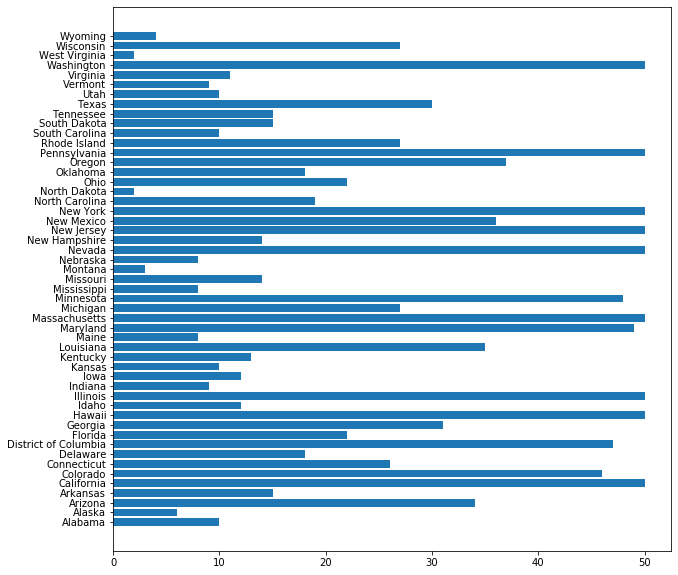

In [82]:
plt.barh(df['State/District'],
        df['Chinese Restaurants'])

<BarContainer object of 51 artists>

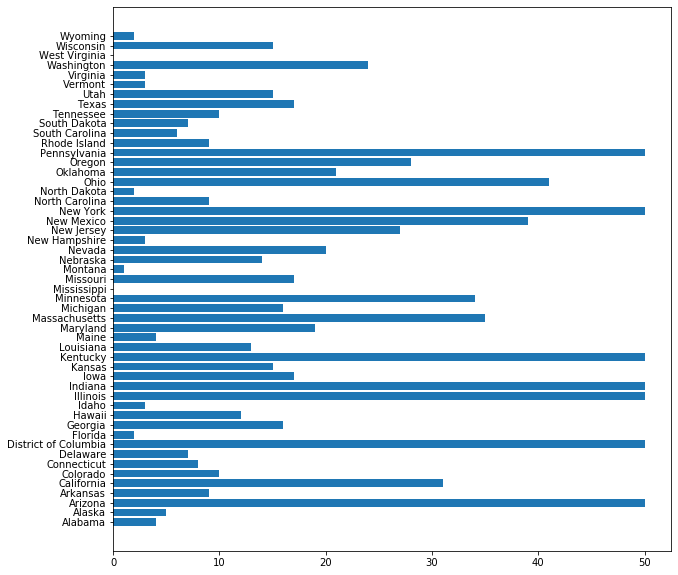

In [85]:
plt.barh(df['State/District'],
        df['Indian Restaurants'])

<BarContainer object of 51 artists>

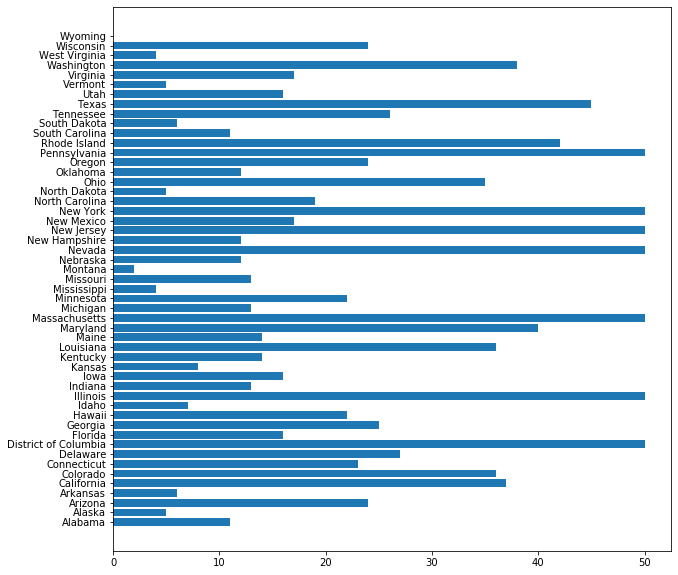

In [86]:
plt.barh(df['State/District'],
        df['Italian Restaurants'])

<BarContainer object of 51 artists>

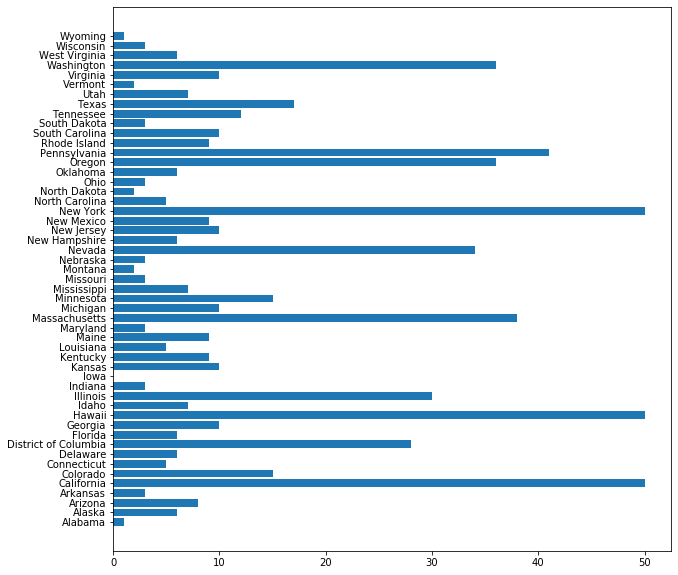

In [93]:
plt.barh(df['State/District'],
        df['Japanese Restaurants'])

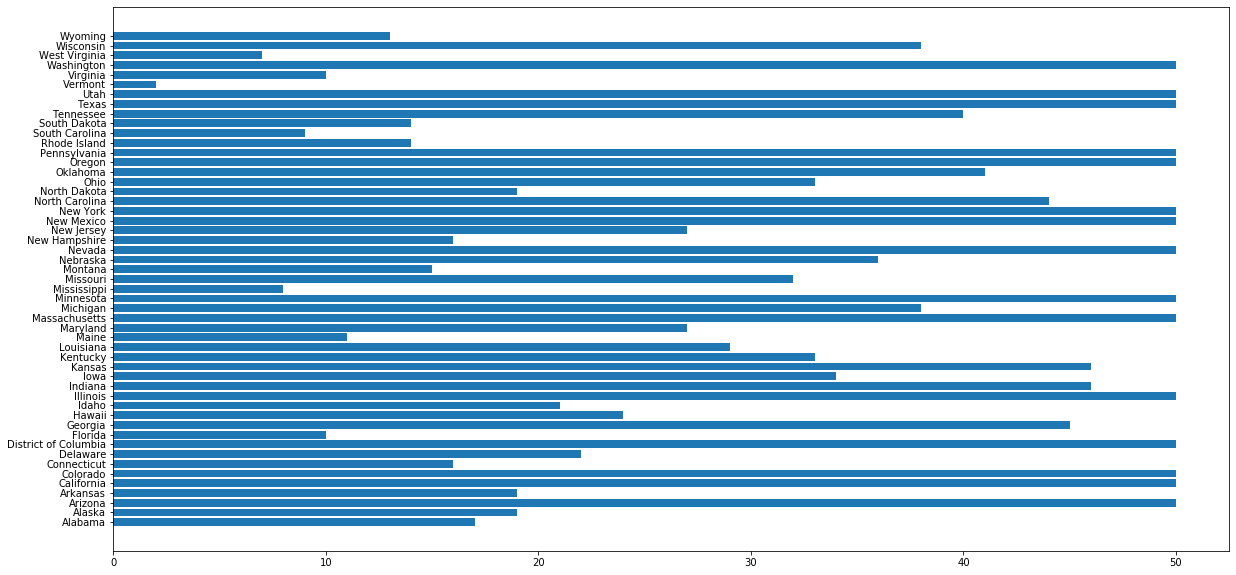

In [109]:
plt.barh(df['State/District'],
        df['Mexican Restaurants'])
plt.rcParams['figure.figsize'] = (5, 5)

<BarContainer object of 51 artists>

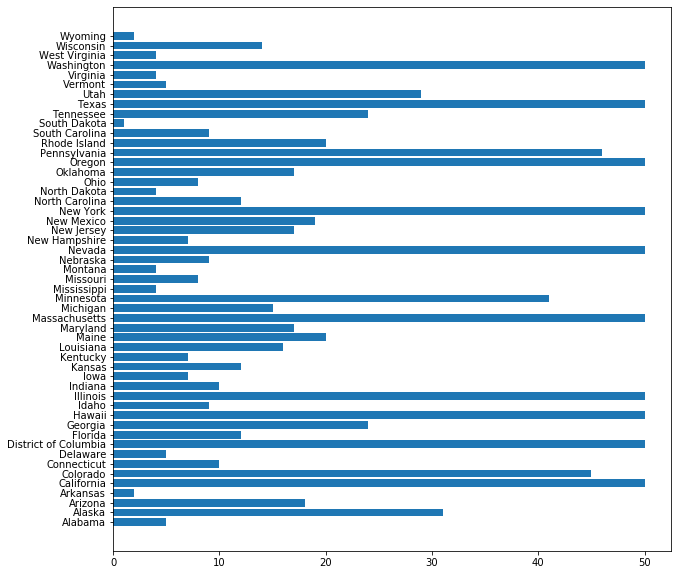

In [87]:
plt.barh(df['State/District'],
        df['Thai Restaurants'])

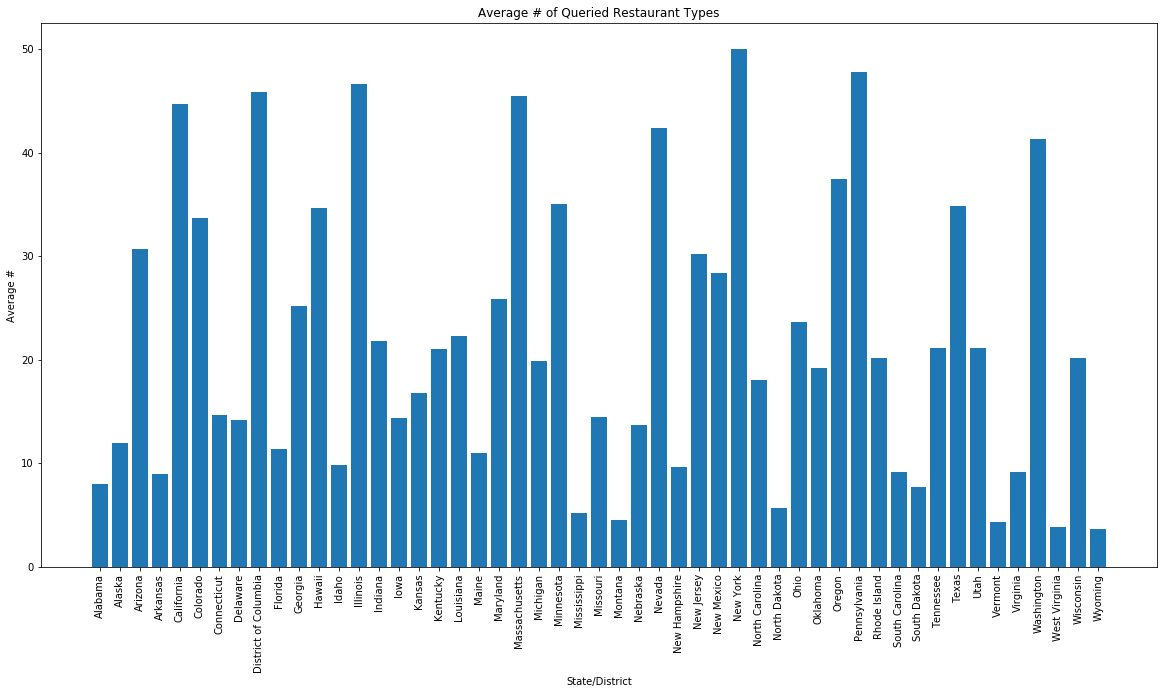

In [97]:
plt.bar(df['State/District'], 
        df['Average Variety'],
       .8)
plt.xticks(rotation = 'vertical')
plt.rcParams['figure.figsize'] = (40, 10)
plt.title('Average # of Queried Restaurant Types')
plt.xlabel('State/District')
plt.ylabel('Average #')
plt.show()


# Results

When we plot the number of Chinese restaurants returned by the Foursquare API for each state. We immediately see that Washington, Pennsylvania, New York, New Jersey, Nevada, Massachusetts, Maryland, Illinois, Hawaii and California are almost, or entirely, maxed out on the x-label. What this shows us is that there is a large amount of competition if one were to open a Chinese restaurant in the most populated cities in these states. On the other hand, we notice states like Wyoming, West Virginia, North Dakota, Montana and Alaska with extremely low counts of Chinese restaurants. This tells us that these areas don't have much competition and may possibly be good locations to open a Chinese restaurant.

When we plot the number of Indian restaurants returned by the Foursquare API in each state, we notice that this graph has more gaps than the previous Chinese restaurant graph. Immediately, we see Wyoming has a small amount. West Virginia has none at all. Virginia, Vermont, North Dakota, New Hampshire, Montana, Idaho and Florida have very few as well. Mississippi also has no Indian restaurants at all. These are certainly low competition areas and ripe for business. Pennsylvania, New York, Kentucky, Indiana, Illinois, D.C., and Arizona are almost maxed out on the x-label.

Surprisingly! When we return a graph for the number of Italian restaurants using the Foursquare API for the most populated  city in each state, Wyoming returns none! West Virginia, Vermont, South Dakota, North Dakota, Montana, Mississippi and Alaska all return low counts. Pennsylvania, New York, New Jersey, Nevada, Massachusetts, Illinois, D.C. all have a high concentration of Italian restaurants and would not be ideal to open a new Italian restaurant.

Japanese restaurants in the U.S. seem to be much more scarce. When "Japanese" is queried, the only states with large values on the x-axis are New York, Hawaii and California. One has to wonder if there would be a difference is the query was "sushi" instead. Wyoming, Wisconsin, Vermont, South Dakota, Ohio, North Dakota, Nebraska, Montana, Missouri, Maryland, Indiana, and Alabama have extremely low counts when the term "Japanese" is queried. Iowa returns no count at all. These results could indicate there is a huge potential market for Japanese restaurants or perhaps our query should be changed or modified.

The query "Mexican" returns us to a more filled out graph once more. Which makes sense seeing as they're the United State's neighbors to the South. There is a high concentration of Mexican restaurants in Washington, Utah, Texas, Pennsylvania, Oregon, North Carolina, New York, Nevada, Minnesota, Massachusetts, The only area notably lacking Mexican restaurants is Vermont!

When querying for Thai restaurants, the results seem to return to being more extreme. Some states, like Washington, Texas, Pennsylvania, New York, Nevada, Massachusetts, Illinois, Hawaii, D.C. and California have an abundance of Thai restaurants. Then on the other hand, states like Wyoming, West Virginia, Virginia, Vermont, South Dakota (especially), North Dakota, Montana, Mississippi and Arkansas have very few.

The final graph shows us that California, D.C., Illinois, Massachusetts, Nevada, New York, Pennsylvania, and Washington all have a large variety of restaurant choices. On the other hand, areas like Alabama, Alaska, Arkansas, Mississippi, Montana, North Dakota, Vermont,  West Virginia and Wyoming have little to none. These areas may possibly represent business opportunities for potential restaurateurs.

# Discussion


In [192]:
stateList = []
for i in df['State/District']:
    stateList.append(i)

tpList = []
for i in df['Total Population']:
    tpList.append(int(i))
    
cpopList = []
for i in df['City Population']:
    cpopList.append(int(i))
    
avList = []
for i in df['Average Variety']:
    avList.append(float(i))

Text(0, 0.5, 'Average Variety')

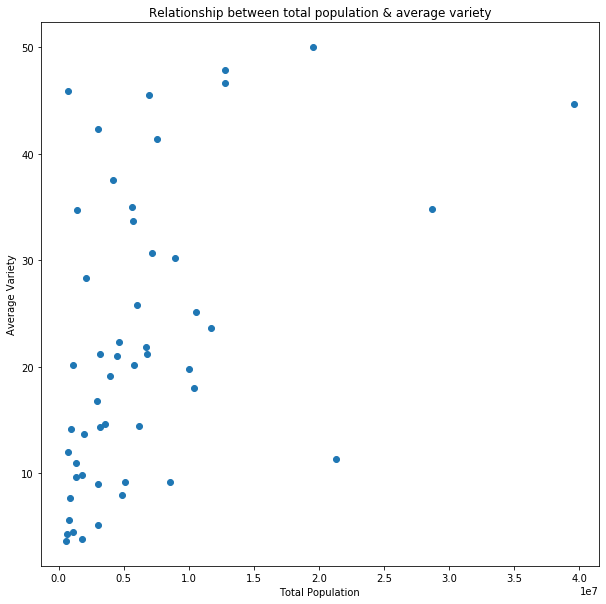

In [184]:
plt.scatter(cpopList, avList)
plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Relationship between total population & average variety')
plt.xlabel('Total Population')
plt.ylabel('Average Variety')

Text(0, 0.5, 'Average Variety')

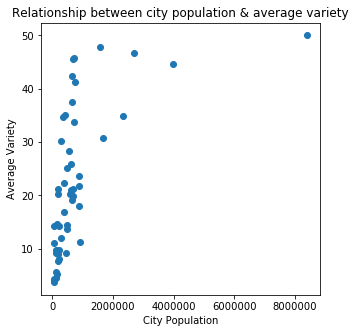

In [197]:
plt.scatter(cpopList, avList)
plt.rcParams['figure.figsize'] = (1, 5)
plt.title('Relationship between city population & average variety')
plt.xlabel('City Population')
plt.ylabel('Average Variety')

There seems to be a slight correlation between the total amount of people in a state or city and the variety of food they have available to them. One factor that may be helpful to explore is number of immigrants from certain countries and the availability of their cuisine in those areas. If one were to find that there was a strong correlation between Indians immigrating to Indiana and the high availability of Indian food in addition to a strong correlation between Indians not immigrating to Mississippi that would explain why the queries returned the results that they did. Additionally, there could just be a lack of demand in any of these areas which would explain why the queries returned little to no results for these areas. Restaurants of these categories could have existed in that location before and had to close due to lack of demand.

# Conclusion

In conclusion, this report shows us that there is a variety of options in the states of California, (the territory of) D.C., Illinois, Massachusetts, New York and Pennsylvania. In Mississippi, Montana, North Dakota, Vermont, West Virginia and Wyoming, there is a lack of variety when it comes to ethnic food. This lack of variety could represent a business opportunity for those looking to open a restaurant. Additionally, we also have realized that we could look into immigration statistics for each state to try and explain why certain states have a concentration of certain ethnic foods and a lack of others.